<h2> K - means on Cusotmer data </h2>

Dataset link : https://www.kaggle.com/binovi/wholesale-customers-data-set#Wholesale%20customers%20data.csv

<h4>The dataset</h4>
<p>
The dataset we will study refers to clients of a wholesale distributor. It contains information such as clients annual<br>
spend on fresh product, milk products, grocery products etc. Below is some more information an each feature:<p>

In [12]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,9


In [2]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Below is a split of categorical and continuous features
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [4]:
# Descriptive statistics below shows on average clients spend the most on fresh groceries and the least on delicassen.
data[continuous_features].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# To use the categorical features, we need to convert the categorical features to binary using pandas get dummies.
# This is used to avoid any relation value with data 
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [6]:
# Scale down the data to give equal importance to all features
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

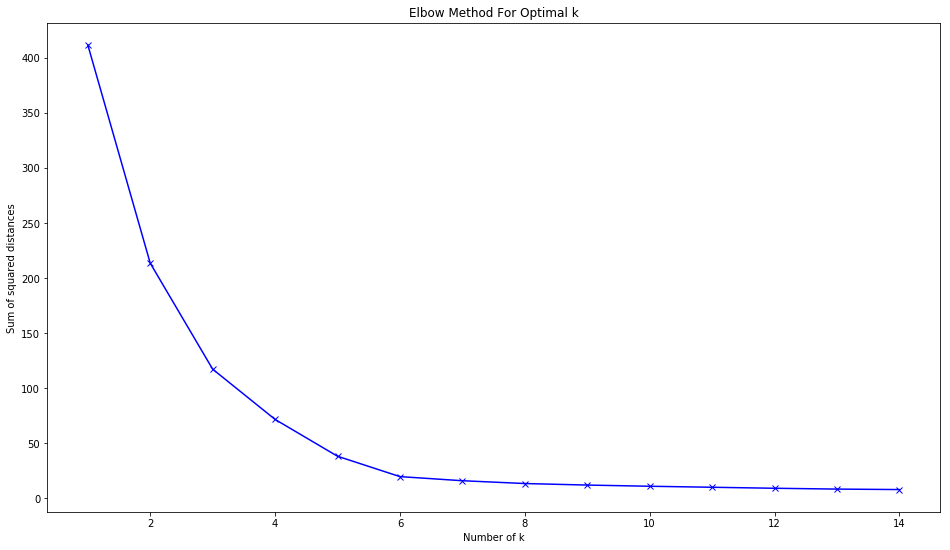

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
X = data_transformed
X[0]

array([0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
       0.02784731, 0.        , 1.        , 0.        , 0.        ,
       1.        ])

In [10]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

[[ 8.76386985e-02  1.48768562e-01  1.71926334e-01  2.44592729e-02
   1.68926075e-01  3.80310706e-02 -2.22044605e-16  1.00000000e+00
  -3.60822483e-16 -6.93889390e-17  1.00000000e+00]
 [ 1.23720906e-01  4.67298591e-02  4.18609634e-02  5.96920070e-02
   1.91966114e-02  3.16079341e-02  1.00000000e+00  4.99600361e-16
  -5.55111512e-17  2.08166817e-16  1.00000000e+00]
 [ 1.15019922e-01  5.19478152e-02  4.33635017e-02  5.09881341e-02
   2.32100094e-02  2.49093146e-02  1.00000000e+00  5.55111512e-17
   1.00000000e+00  8.32667268e-17 -3.33066907e-16]
 [ 5.59094691e-02  1.34946351e-01  1.87192247e-01  3.32529624e-02
   2.03734819e-01  3.22052340e-02  2.22044605e-16  1.00000000e+00
   4.86486486e-01  5.13513514e-01 -2.22044605e-16]
 [ 1.03858613e-01  3.06257914e-02  4.73447083e-02  9.40115001e-02
   1.17507909e-02  2.30056916e-02  1.00000000e+00  2.77555756e-16
   8.32667268e-17  1.00000000e+00 -2.22044605e-16]]


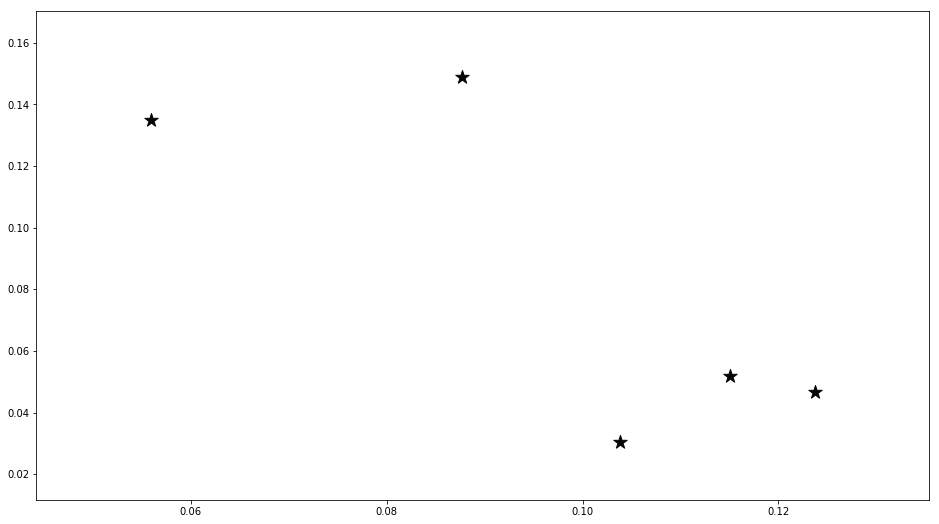

In [14]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
# plt.scatter(X[:, 0], X[:, 1] , c=labels, s=50, cmap='viridis')